In [1]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [3]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [4]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [5]:
#These cells should print the length of df
#df['app_id'].count().compute()

In [6]:
#len(df.index)#ritorna il numero di righe

In [7]:
#le colonne di interesse sono app_id (int64), review, 
#weighted_vote_scre,
#steam_purchase, received_for_free, recommended


In [8]:
#import the dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [10]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [11]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21827 entries, 0 to 21826
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21827 non-null  int64  
 1   app_id                          21827 non-null  int64  
 2   app_name                        21827 non-null  object 
 3   review_id                       21827 non-null  int64  
 4   language                        21827 non-null  object 
 5   review                          21790 non-null  object 
 6   timestamp_created               21827 non-null  int64  
 7   timestamp_updated               21827 non-null  int64  
 8   recommended                     21827 non-null  bool   
 9   votes_helpful                   21827 non-null  int64  
 10  votes_funny                     21827 non-null  int64  
 11  weighted_vote_score             21827 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,1080,292030,The Witcher 3: Wild Hunt,84973411,polish,zajebista gra <3,1611059050,1611059050,True,0,...,True,False,False,76561198887720106,36,7,2162.0,776.0,2162.0,1.610979e+09
1,2872,292030,The Witcher 3: Wild Hunt,84653986,schinese,喜欢剧情的玩家不容错过,1610604099,1610604099,True,0,...,True,False,False,76561198424596977,83,1,7799.0,4099.0,4760.0,1.611326e+09
2,4382,292030,The Witcher 3: Wild Hunt,84413227,english,"Looks good, smooth, good story. Sometimes not ...",1610264150,1610264150,True,0,...,True,False,False,76561198412744751,6,1,2247.0,60.0,2186.0,1.611214e+09
3,5935,292030,The Witcher 3: Wild Hunt,84190450,russian,Самоя лучшая игра за последние 6 лет!!)\nНевоо...,1609983643,1609983643,True,0,...,False,False,False,76561199087254798,10,7,6475.0,1.0,6461.0,1.610998e+09
4,6773,292030,The Witcher 3: Wild Hunt,84064939,schinese,我做了两小时的舔狗任务就为了看那几秒的CG?,1609849086,1609849086,True,0,...,True,False,False,76561198425425949,23,2,3057.0,1910.0,633.0,1.611307e+09


In [12]:
df.duplicated() #Returns a boolean Series denoting duplicate rows

0        False
1        False
2        False
3        False
4        False
         ...  
21822    False
21823    False
21824    False
21825    False
21826    False
Length: 21827, dtype: bool

In [13]:
df.memory_usage( )

Index                                128
Unnamed: 0                        174616
app_id                            174616
app_name                          174616
review_id                         174616
language                          174616
review                            174616
timestamp_created                 174616
timestamp_updated                 174616
recommended                        21827
votes_helpful                     174616
votes_funny                       174616
weighted_vote_score               174616
comment_count                     174616
steam_purchase                     21827
received_for_free                  21827
written_during_early_access        21827
author.steamid                    174616
author.num_games_owned            174616
author.num_reviews                174616
author.playtime_forever           174616
author.playtime_last_two_weeks    174616
author.playtime_at_review         174616
author.last_played                174616
dtype: int64

In [14]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            37
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         14
author.last_played                 0
dtype: int64

<AxesSubplot:>

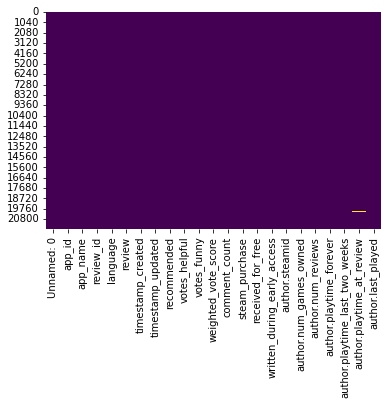

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

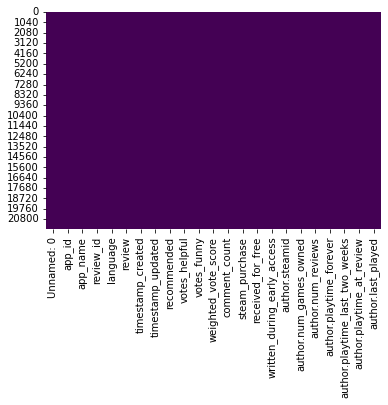

In [16]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

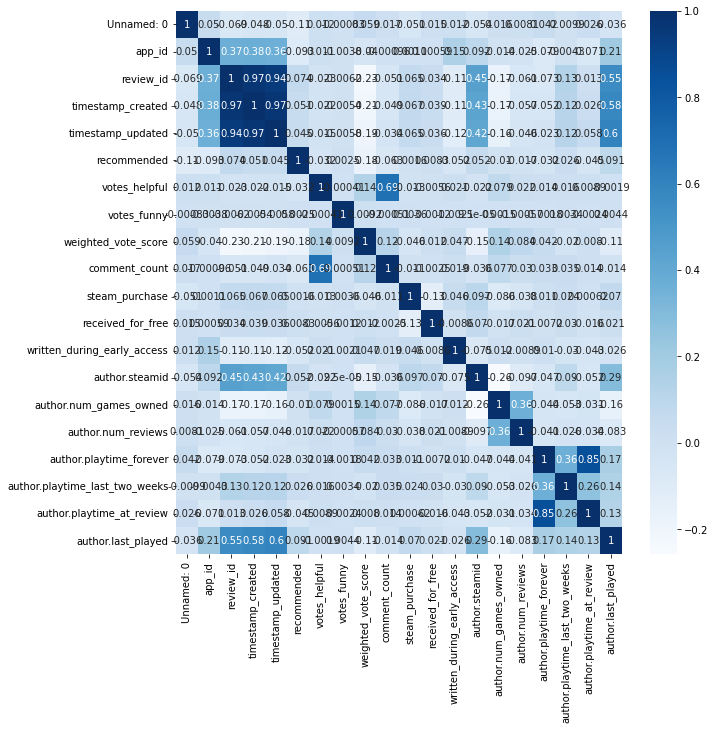

In [17]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

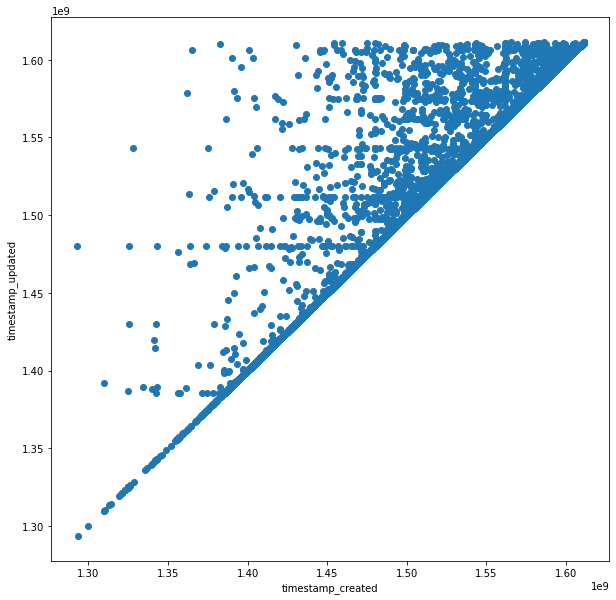

In [18]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [19]:
df["app_name"].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS       1637
Grand Theft Auto V                  1083
Tom Clancy's Rainbow Six Siege       827
Terraria                             686
Garry's Mod                          644
                                    ... 
Umbrella Corps                         1
Fishing: Barents Sea                   1
BERSERK and the Band of the Hawk       1
GOD EATER 3                            1
The End Is Nigh                        1
Name: app_name, Length: 306, dtype: int64

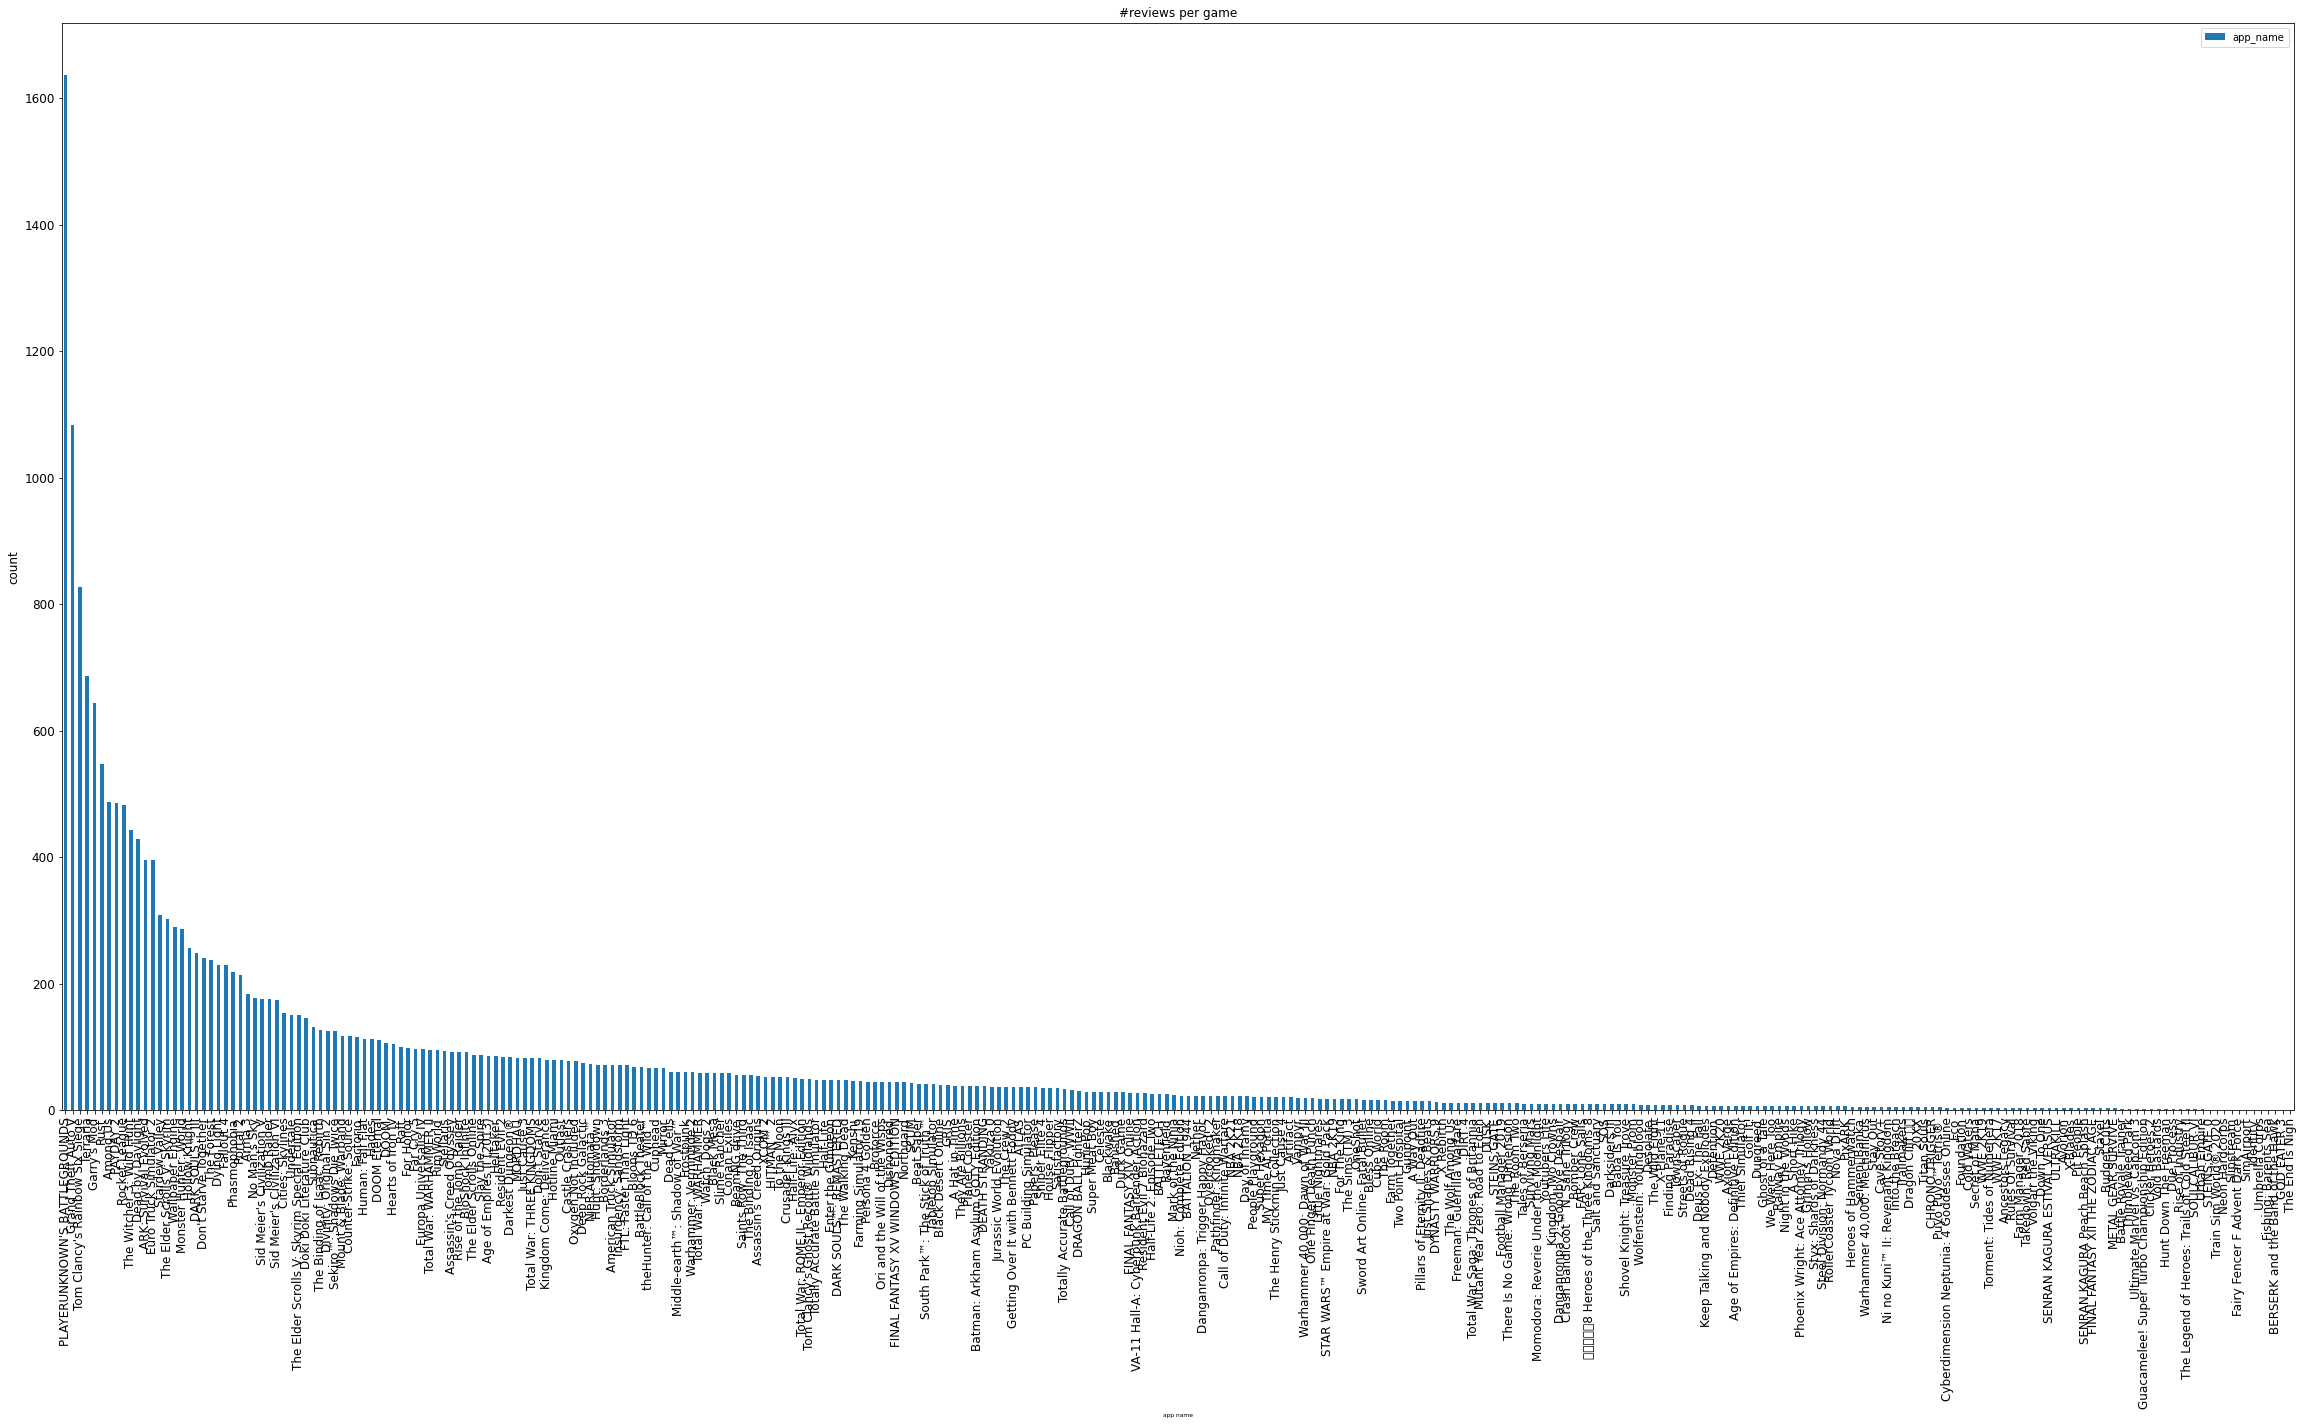

In [25]:
#The only way to read the names is by saving the image and then zooming in
ax=df["app_name"].value_counts().plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=6)
ax.set_ylabel("count", fontsize=12)
plt.show()

### What applications have the best Weighted Vote Score?

In [21]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) and take the 
#ones with the highest values -----> we'll implement both approaches

In [22]:
#Here we just pick the 10 games with the highest score
df["weighted_vote_score"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
21822    0.523810
21823    0.000000
21824    0.000000
21825    0.000000
21826    0.519231
Name: weighted_vote_score, Length: 21827, dtype: float64

In [23]:
df.nlargest(10,"weighted_vote_score").loc[:,"app_name"]

16176                     Stellaris
6745                       Among Us
2749                     The Forest
3621                  Hollow Knight
2472               Human: Fall Flat
10983                    Townscaper
20806    Freeman: Guerrilla Warfare
4343         Euro Truck Simulator 2
7029                       Among Us
7347                           Rust
Name: app_name, dtype: object

In [24]:
ax=df.nlargest(10,"weighted_vote_score").loc[:,"app_name"].plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=10)
ax.set_ylabel("peak weighted vote score", fontsize=12)
plt.show()

TypeError: no numeric data to plot